In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("pollution.csv")

In [3]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


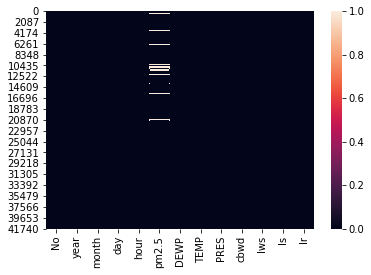

In [4]:
sns.heatmap(df.isna())

In [5]:
for i in df.columns:
    print("In ",i," NaN values are  ",df[i].isna().sum())

In  No  NaN values are   0
In  year  NaN values are   0
In  month  NaN values are   0
In  day  NaN values are   0
In  hour  NaN values are   0
In  pm2.5  NaN values are   2067
In  DEWP  NaN values are   0
In  TEMP  NaN values are   0
In  PRES  NaN values are   0
In  cbwd  NaN values are   0
In  Iws  NaN values are   0
In  Is  NaN values are   0
In  Ir  NaN values are   0


In [6]:
df["pm2.5"].fillna(0,inplace=True)

In [7]:
for i in df.columns:
    print("In ",i," NaN values are  ",df[i].isna().sum())

In  No  NaN values are   0
In  year  NaN values are   0
In  month  NaN values are   0
In  day  NaN values are   0
In  hour  NaN values are   0
In  pm2.5  NaN values are   0
In  DEWP  NaN values are   0
In  TEMP  NaN values are   0
In  PRES  NaN values are   0
In  cbwd  NaN values are   0
In  Iws  NaN values are   0
In  Is  NaN values are   0
In  Ir  NaN values are   0


In [8]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,0.0,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,0.0,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,0.0,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,0.0,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,0.0,-20,-12.0,1018.0,NW,12.97,0,0


In [9]:
#Converting Year Month day and hour to single column date
df['Date']=pd.to_datetime(df[['year','month','day','hour']])

#Dropping  No column and other
df.drop(columns=["No","year","month","day","hour"],inplace=True)

#Changing Columns name
df.columns=['pollution','dew','temp','press','wind_dir','wind_spd','snow','rain','Date']



df.head()


,pollution,dew,temp,press,wind_dir,wind_spd,snow,rain,Date
0,0.0,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01 00:00:00
1,0.0,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01 01:00:00
2,0.0,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01 02:00:00
3,0.0,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01 03:00:00
4,0.0,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01 04:00:00


In [10]:
df.set_index(['Date'],inplace=True)

df.head()

,pollution,dew,temp,press,wind_dir,wind_spd,snow,rain
Date,,,,,,,,
2010-01-01 00:00:00,0.0,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,0.0,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,0.0,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,0.0,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,0.0,-20,-12.0,1018.0,NW,12.97,0,0


In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


#Integer Encoding Direction
encoder=LabelEncoder()
df.iloc[:,4]=encoder.fit_transform(df.values[:,4])

#MinMaxscaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled=scaler.fit_transform(df)

new_df=pd.DataFrame(scaled)

#Renameing Columns
new_df.columns=['pollution','dew','temp','press','wind_dir','wind_spd','snow','rain']

#Shifting output column by 1
new_df['output']=new_df['temp'].shift(-1)
new_df[:-1].head()

,pollution,dew,temp,press,wind_dir,wind_spd,snow,rain,output
0,0.0,0.279412,0.131148,0.545455,0.333333,0.002290,0.0,0.0,0.114754
1,0.0,0.279412,0.114754,0.527273,0.333333,0.007639,0.0,0.0,0.131148
2,0.0,0.279412,0.131148,0.509091,0.333333,0.010698,0.0,0.0,0.081967
3,0.0,0.279412,0.081967,0.509091,0.333333,0.016047,0.0,0.0,0.114754
4,0.0,0.294118,0.114754,0.490909,0.333333,0.021396,0.0,0.0,0.147541


In [20]:
#split in train and test
values=new_df.values
split=365*24*4
train=values[:split]
test=values[split:]
#Splitting in input and output
train_x=train[:,:-1]
train_y=train[:,-1]
test_x=test[:-1,:-1]
test_y=test[:-1,-1]
# reshape input to be 3D [samples, timesteps, features]
train_x=train_x.reshape(train_x.shape[0],1,train_x.shape[1])
test_x=test_x.reshape(test_x.shape[0],1,test_x.shape[1])

print("Training Shape",train_x.shape)
print("Testing Shape",test_x.shape)


Training Shape (35040, 1, 8)
Testing Shape (8783, 1, 8)


Train on 35040 samples, validate on 8783 samples
Epoch 1/50
 - 4s - loss: 0.0593 - val_loss: 0.1479
Epoch 2/50
 - 2s - loss: 0.0356 - val_loss: 0.0910
Epoch 3/50
 - 2s - loss: 0.0302 - val_loss: 0.0678
Epoch 4/50
 - 2s - loss: 0.0279 - val_loss: 0.0504
Epoch 5/50
 - 2s - loss: 0.0265 - val_loss: 0.0451
Epoch 6/50
 - 2s - loss: 0.0253 - val_loss: 0.0353
Epoch 7/50
 - 2s - loss: 0.0245 - val_loss: 0.0308
Epoch 8/50
 - 2s - loss: 0.0236 - val_loss: 0.0333
Epoch 9/50
 - 2s - loss: 0.0230 - val_loss: 0.0281
Epoch 10/50
 - 2s - loss: 0.0225 - val_loss: 0.0278
Epoch 11/50
 - 2s - loss: 0.0220 - val_loss: 0.0269
Epoch 12/50
 - 2s - loss: 0.0216 - val_loss: 0.0254
Epoch 13/50
 - 2s - loss: 0.0212 - val_loss: 0.0238
Epoch 14/50
 - 2s - loss: 0.0210 - val_loss: 0.0261
Epoch 15/50
 - 2s - loss: 0.0208 - val_loss: 0.0231
Epoch 16/50
 - 2s - loss: 0.0206 - val_loss: 0.0235
Epoch 17/50
 - 3s - loss: 0.0203 - val_loss: 0.0218
Epoch 18/50
 - 3s - loss: 0.0203 - val_loss: 0.0226
Epoch 19/50
 - 3s - loss

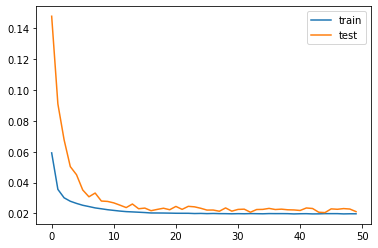

0.06938412311157709

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from matplotlib import pyplot
from keras.layers import Bidirectional
from keras.layers import Dropout

model=Sequential()
model.add(Bidirectional(LSTM(50,input_shape=(train_x.shape[1],train_x.shape[2]))))
model.add(Dropout(.2))
model.add(Dense(1))
model.compile(loss='mae',optimizer='adam')

history=model.fit(train_x,train_y,epochs=50,batch_size=72,validation_data=(test_x,test_y),verbose=2,shuffle=False)
pyplot.plot(history.history['loss'],label='train')
pyplot.plot(history.history['val_loss'],label='test')
pyplot.legend()

pyplot.show()


yhat = model.predict(test_x)
np.mean(test_y-yhat)
np.var(test_y-yhat)

In [14]:
from numpy import concatenate
#Inverse Transform
def predict(test_x,test_y):
    yhat=model.predict(test_x)
    test_x_inv=test_x.reshape(test_x.shape[0],test_x.shape[2])

    a=pd.DataFrame(test_x.reshape(test_x.shape[0],test_x.shape[2]))
    b=pd.DataFrame(test_y.reshape(test_y.shape[0],1))
    c=pd.DataFrame(yhat.reshape(test_y.shape[0],1))

    test_inv=scaler.inverse_transform(pd.concat([a.iloc[:,1:],b],axis=1))
    test_pred=scaler.inverse_transform(pd.concat([a.iloc[:,1:],c],axis=1))


    #PLot
    pyplot.plot(test_pred[110:128,-1],label='Prediction')
    pyplot.plot(test_inv[110:128,-1],label='Truth')
    pyplot.legend()
    pyplot.show()
    
    Mean_abs_err=np.mean(np.abs(test_pred[:,-1]-test_inv[:,-1]))
    
    return Mean_abs_err


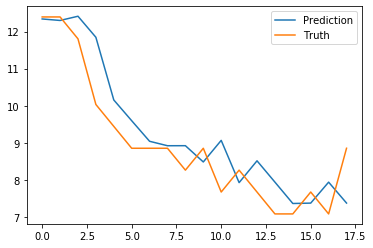

0.7634379080094289

In [25]:
predict(test_x,test_y)

# Multiple Time lags

In [16]:
#Integer Encoding Direction
encoder=LabelEncoder()
df.iloc[:,4]=encoder.fit_transform(df.values[:,4])

#last 3 lags
new_df=pd.concat([df.shift(1),df.shift(2),df.shift(3)],axis=1)
new_df['outcome']=df.iloc[:,2]
new_df=new_df[3:]

#MinMaxscaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled=scaler.fit_transform(new_df)

scaled_df=pd.DataFrame(scaled)

scaled_df.head()



,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.0,0.279412,0.131148,0.509091,0.333333,0.010698,0.0,0.0,0.0,0.279412,...,0.0,0.0,0.279412,0.131148,0.545455,0.333333,0.002290,0.0,0.0,0.081967
1,0.0,0.279412,0.081967,0.509091,0.333333,0.016047,0.0,0.0,0.0,0.279412,...,0.0,0.0,0.279412,0.114754,0.527273,0.333333,0.007639,0.0,0.0,0.114754
2,0.0,0.294118,0.114754,0.490909,0.333333,0.021396,0.0,0.0,0.0,0.279412,...,0.0,0.0,0.279412,0.131148,0.509091,0.333333,0.010698,0.0,0.0,0.147541
3,0.0,0.308824,0.147541,0.472727,0.333333,0.026745,0.0,0.0,0.0,0.294118,...,0.0,0.0,0.279412,0.081967,0.509091,0.333333,0.016047,0.0,0.0,0.163934
4,0.0,0.308824,0.163934,0.472727,0.333333,0.032094,0.0,0.0,0.0,0.308824,...,0.0,0.0,0.294118,0.114754,0.490909,0.333333,0.021396,0.0,0.0,0.163934


In [17]:
#split in train and test
values=scaled_df.values
split=365*24*4
train=values[:split]
test=values[split:]
#Splitting in input and output
train_x=train[:,:-1]
train_y=train[:,-1]
test_x=test[:,:-1]
test_y=test[:,-1]
# reshape input to be 3D [samples, timesteps, features]
train_x=train_x.reshape(train_x.shape[0],1,train_x.shape[1])
test_x=test_x.reshape(test_x.shape[0],1,test_x.shape[1])

print("Training Shape",train_x.shape)
print("Testing Shape",test_x.shape)

Training Shape (35040, 1, 24)
Testing Shape (8781, 1, 24)


Train on 35040 samples, validate on 8781 samples
Epoch 1/50
 - 2s - loss: 0.0437 - val_loss: 0.0708
Epoch 2/50
 - 2s - loss: 0.0261 - val_loss: 0.0384
Epoch 3/50
 - 2s - loss: 0.0229 - val_loss: 0.0376
Epoch 4/50
 - 2s - loss: 0.0206 - val_loss: 0.0398
Epoch 5/50
 - 2s - loss: 0.0188 - val_loss: 0.0407
Epoch 6/50
 - 2s - loss: 0.0179 - val_loss: 0.0255
Epoch 7/50
 - 2s - loss: 0.0176 - val_loss: 0.0300
Epoch 8/50
 - 2s - loss: 0.0177 - val_loss: 0.0281
Epoch 9/50
 - 2s - loss: 0.0173 - val_loss: 0.0281
Epoch 10/50
 - 2s - loss: 0.0171 - val_loss: 0.0301
Epoch 11/50
 - 2s - loss: 0.0172 - val_loss: 0.0293
Epoch 12/50
 - 2s - loss: 0.0173 - val_loss: 0.0285
Epoch 13/50
 - 2s - loss: 0.0169 - val_loss: 0.0276
Epoch 14/50
 - 2s - loss: 0.0169 - val_loss: 0.0277
Epoch 15/50
 - 2s - loss: 0.0169 - val_loss: 0.0285
Epoch 16/50
 - 2s - loss: 0.0168 - val_loss: 0.0282
Epoch 17/50
 - 2s - loss: 0.0168 - val_loss: 0.0285
Epoch 18/50
 - 2s - loss: 0.0167 - val_loss: 0.0281
Epoch 19/50
 - 2s - loss

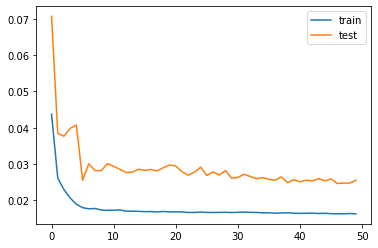

0.06736365481299532

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from matplotlib import pyplot

model=Sequential()
model.add(LSTM(50,input_shape=(train_x.shape[1],train_x.shape[2])))
model.add(Dense(1))
model.compile(loss='mae',optimizer='adam')

history=model.fit(train_x,train_y,epochs=50,batch_size=72,validation_data=(test_x,test_y),verbose=2,shuffle=False)
pyplot.plot(history.history['loss'],label='train')
pyplot.plot(history.history['val_loss'],label='test')
pyplot.legend()

pyplot.show()


yhat = model.predict(test_x)
np.mean(test_y-yhat)
np.var(test_y-yhat)

In [114]:
test_x.shape,test_y.shape

((8781, 1, 24), (8781,))

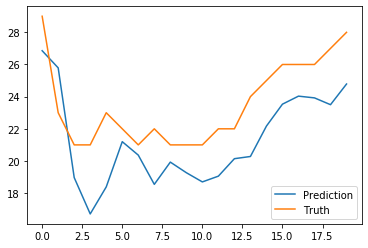

1.7063329098811717

In [122]:
yhat=model.predict(test_x)
test_x_inv=test_x.reshape(test_x.shape[0],test_x.shape[2])

a=pd.DataFrame(test_x.reshape(test_x.shape[0],test_x.shape[2]))
b=pd.DataFrame(test_y.reshape(test_y.shape[0],1))
c=pd.DataFrame(yhat.reshape(test_y.shape[0],1))

test_inv=scaler.inverse_transform(pd.concat([a.iloc[:,:],b],axis=1))
test_pred=scaler.inverse_transform(pd.concat([a.iloc[:,:],c],axis=1))

#PLot
pyplot.plot(test_pred[4000:4020,-1],label='Prediction')
pyplot.plot(test_inv[4000:4020,-1],label='Truth')
pyplot.legend()
pyplot.show()

Mean_abs_err=np.mean(np.abs(test_pred[:,-1]-test_inv[:,-1]))

Mean_abs_err

In [1]:
#Single lag is better then multiple time lag